# Jupyter Notebook with SoS Kernel

Jupyter notebook is a web application that allows you to create documents with live code and results. The underlying interpreters of the cells are called **kernel**. For example, you can use a `python` kernel to interpret python expressions, or a `ir` kernel to interpret `R` commands. You can use sos within a `python` kernel by loading the `sos_magic` ipython extension, or use a `sos` kernel to create a complete SoS environment. In addition to the ability to execute SoS workflows within Jupyter, the SoS kernel allows you to start subkernels (e.g. `ir`) and switch between the subkernels in the same notebook. That allows you to freely mix code in different languages in the same notebook.

## Installing the SoS kernel

The SoS installation process will install a SoS kernel by default. To verify if you have the sos kernel installed, use command `jupyter kernelspec list` from command line (here we use the `!` magic to run commands from Jupyter notebook):

In [1]:
!jupyter kernelspec list

Available kernels:
  python3    /Users/bpeng1/anaconda/lib/python3.5/site-packages/ipykernel/resources
  bash       /Users/bpeng1/Library/Jupyter/kernels/bash
  ir         /Users/bpeng1/Library/Jupyter/kernels/ir
  sos        /Users/bpeng1/anaconda/share/jupyter/kernels/sos


and check if you have `sos` listed as one of the kernels. If not, try to re-install SoS using `pip3 install sos --upgrade` or clone SoS locally and run `python setup.py install`. At the end of the installation process, you should see
```
IPython kernel named "sos" is installed.
```
If the kernel is installed, fire Jupyter using command
```
$ jupyter notebook
```
from the `New` button to the top right corner, select `SoS`, and create a SoS notebook.

SoS uses [imagemagick](http://www.imagemagick.org/script/index.php) and python package [`wand`](http://docs.wand-py.org/en/0.4.2/) to preview output files so it is recommended that you install imagemagick.

## Convert a SoS workflow to Jupyter notebook

You can convert an existing SoS script to the `.ipynb` format using command
```
$ sos convert myscript.sos myscript.ipynb
```

and open the resulting notebook from the web interface. The converter uses lines that starts with `%cell` to split SoS a script into cells in Jupyter notebook.


## Using the SoS kernel

You can enter any SoS expression and statements in a Jupyter notebook but each cell needs to be a valid SoS script. That is to say, 

* You can enter any Python expression and statements. For example, you can write pieces of SoS code and evaluate them

In [2]:
res_path = '/path/to/resource'
ref_genome = "${res_path}/hg19"

* You can enter any SoS actions in function or script format. For example, you can execute a shell script using

In [3]:
run:
    echo Reference genome is located at ${ref_genome}


Reference genome is located at /path/to/resource/hg19


* You can create markdown cells to document your workflow. These cells are not evaluated by SoS so string interpolations are not available to these cells.

* Enter complete SoS steps with or without headers. 

In [4]:
[10]
print("I am in ${step_name}")
[20]
print("I am in ${step_name}")
[30]
print("I am in ${step_name}")

I am in default_10
I am in default_20
I am in default_30


## SOS Magics

In addition to SoS statements, you can use a few SoS magics in Jupyter notebook. They are similar to ipython sos magics but the syntax are a bit different. SoS magics have to be specified at the beginning of a cell although multiple magics could be used in a single cell. SoS supports the following jupyter magics:

###  `%use kernel` 

   This magic starts (or switches to) an alternative jupyter kernel to which expanded code (with string interpolation) will be sent. Kernel set by `%use kernel` will be persistent, affecting all subsequent cells.

   `kernel` can be any [Jupyter supported kernels](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages). In particular, you can use `ir` for R kernel (alias `R` is also acceptable), `python3` for python3, `iperl` for perl, `bash` for bash. Please refer to [IRKernel](https://github.com/IRkernel/IRkernel) for instructions on how to install the `ir` kernel for `R`.

   `%use` magic accepts parameters `--in (-i)` and `--out (-o)`, which are variables that will be transferred to the subkernel after starting (or switching to) the subkernel, and variables that will be transferred back to SoS before magic `%use sos`. More specifically,

In [5]:
n = 5

In [6]:
%use R -i n -o ran
ran <- rnorm(n)

In [7]:
%use sos
ran

[-1.27611059818933,
 2.18814238543164,
 1.48379974109028,
 -1.09395128239875,
 -1.56521646583435]

  is equivalent to

In [8]:
%use R
%get n
ran <- rnorm(n)

In [9]:
%put ran
%use sos
ran

[-1.42407652720487,
 -0.0515974072056542,
 0.711202366758376,
 -1.42605338750391,
 0.410584345620182]

### `%with kernel`

  `%with kernel` also starts (or switches to) a subkernel, but kernel specified by `%with kernel` will be reset as soon as the cell is executed. This magic is therefore suitable for a quick errand to another kernel. This magic also accepts options `--in` (or `-i`) and `--out` (or `-o`), so you could use

In [10]:
%use R -i n -o ran
ran <- rnorm(n)

to get a list of normally distributed numbers using R's `rnorm` function.

### `%preview [filename1] [filename2] [expr1] [expr2] ...`

The `%preview` magic preview the content of specified files or values of specified expressions **after** the execution of the current cell. For example, in a subkernel R, you can do

In [11]:
%use R

pdf 
  2

## %preview a.png

> a.png (13.5 KiB):

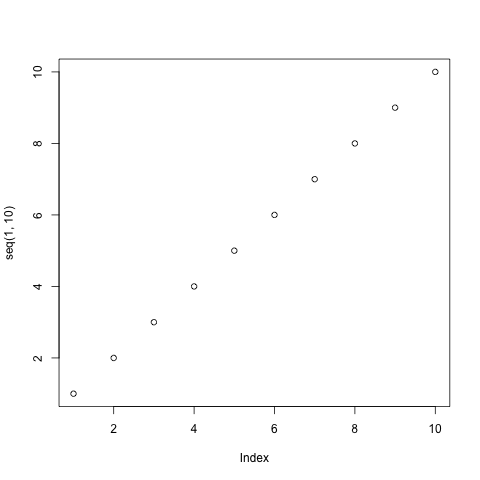

In [12]:
%preview a.png
png('a.png')
plot(seq(1,10))
dev.off()

to preview `a.png` generated by this step. Note that SoS automatically previews output files of SoS statements specified by the `output:` directive, but `output:` does not work for subkernels.

The magic also accept sos variable and expressions. For example,

In [13]:
%use sos
%preview data
import pandas as pd
data = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])})

## %preview data

>>> data:

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


would display the content of the pandas `DataFrame`. You can specify any Python (sos) expression for this magic but, similar to command line arguments, you will need to quote the expression if it contains spaces. For example,

In [14]:
%preview data['one']
data = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])})

## %preview data['one']

>>> data['one']:

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

### `%put` (`ir` and `python` kernels only)

Magics `%put` are used to return results from subkernel to SoS kernel when the current kernel is a subkernel started by magic `%use`. Only the `ir` and `python` kernels are supported now. Whereas there is virtually no limit on exchangeable datatypes between `SoS` and `python` kernels, there are no perfect map between Python (SoS) and `R` datatypes so SoS tries to find the best match between data types. More specifically,

  
  | R  |  length (n) |   Python |
  | --- | --- |---|
  | NULL | |    None |
  | logical |  1 |  boolean |
  | integer |  1 |  integer |
  | numeric |  1 |  double |
  | character |  1 |  unicode |
  | logical |  n > 1 |  list |
  | integer |  n > 1 |  list |
  | numeric |  n > 1 |  list |
  | character |  n > 1 |  list |
  | list without names |  n > 0 |  list |
  | list with names |  n > 0 |  dict |
  | matrix |  n > 0 |  numpy.array |
  | data.frame |  n > 0 |  DataFrame |

### `%get` (`ir` and `python` kernels only)

Magics `%get` retrieve variables from the SoS to the current subkernel started by magic `%use`. Only the `ir` and `python` kernels are supported now. SoS tries to use the best matching data type for the conversion. More specifically,

  
  | Python  |  cond |   R |
  | --- | --- |---|
  | None | |    NULL |
  | boolean |   | logical |
  | integer |  |  integer |
  | float |  |  float |
  | str |  | character |
  | Sequence (list, tuple, ...) |  homogenous type |  c() |
  | Sequence (list, tuple, ...) |  multiple types |  list |
  | set |  |  list |
  | dictionary |  |  list with names |
  | numpy.ndarray |  | c() array |
  | numpy.matrix |  | matrix |
  | pandas.DataFrame |  |  R data.frame |

  Python objects in other datatypes are transferred as string `"Unsupported datatype"`.

### `%paste [command-options] [workflow-options]`

This magic pastes content of clipboard to the cell and execute the cell. It is similar but sometimes more convenient than pasting the content using system shortcuts such as `Cmd-V` (mac).

### `%run [command-options] [workflow-options]`

The `%sos` magic allows you to specify SoS options such as `-v` (verbosity), `-j` (max number of jobs), and workflow options as defined by `parameter:` keyword.

### `%set [command-options] [workflow-options]`

The `%set` magic sets a persistent sos options so you do not have to enter them each time after `%run` or `%paste`. For example, if you set `%set -v3`, you can execute all cells in the notebook at verbosity level 3 (`DEBUG`).

### `%matplotlib [GUI]`

Similar to ipython's `matplotlib` magic, the `%matplotlib inline` magic allows the display of matplotlib figures inline in Jupyter notebook or qtconsole.

### `%restart kernel`

`%restart` specified kernel without affecting the current working kernel. 

### `%dict [--reset] [--keys] [--all] var1 var2` 

The `%dict` magic lists or rests the content of SoS dict, using syntax

    ```
    %dict [-a|-all] [-k|--keys] [-r|--reset] [var1] [var2] ...
    ```

    where

    * `var1`, `var2` etc are name of variables. All variables will be displayed if no variable is specified.
    * `-a|-all`: list all dictionary keys, including SoS functions and variables.
    * `-k|--keys`: list only keys, not their values
    * `-r|--reset`: reset the dictionary to its original content (with only SoS internal values)

### `%cd dir`

Change current working directory to `dir`.

### `!any-shell-command` such as `!ls` and `!pwd`

If any other command is entered after `!`, sos will treat the rest of the line as a shell command and execute it. Only single-line commands are supported. String interpolation is supported. Note that `!cd` does not change the current working directory because the command is executed in a separate process. Use magic `%cd` for that purpose.

## Convert `.ipynb` files to `.sos`

You can save the notebook to a SoS script using `File` -> `Download As` -> `SoS`, or using command

```
$ sos convert myscript.ipynb --sos myscript.sos
```

The conversion process will strip all results (which can be useful if you would like to version control your notebook without results) but keep cell information and SoS magics. However, **SoS files converted from Jupyter notebook cannot be executed by the `sos` command if they contain SoS magics such as `%use R`** because of non-interactive execution of SoS steps and more rigorous structure required for SoS scripts. You will generally need to 